А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [5]:
aa_df=pd.read_csv('https://stepik.org/media/attachments/lesson/396012/hw_aa.csv',sep=';')

In [6]:
aa_df.head()

Unnamed: 0                               uid  experimentVariant version  \
0           1  c4ca4238a0b923820dcc509a6f75849b                  1  v2.8.0   
1           2  c81e728d9d4c2f636f067f89cc14862c                  0  v2.9.0   
2           3  eccbc87e4b5ce2fe28308fd9f2a7baf3                  1  v2.9.0   
3           4  a87ff679a2f3e71d9181a67b7542122c                  1  v2.8.0   
4           5  e4da3b7fbbce2345d7772b0674a318d5                  1  v2.8.0   

   purchase  
0         0  
1         0  
2         0  
3         0  
4         0

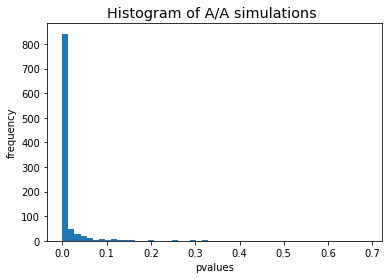

0.93

In [7]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [8]:
#Мы получили p-value>0.05, что говорит об ошибке в проведении эксперимента. 

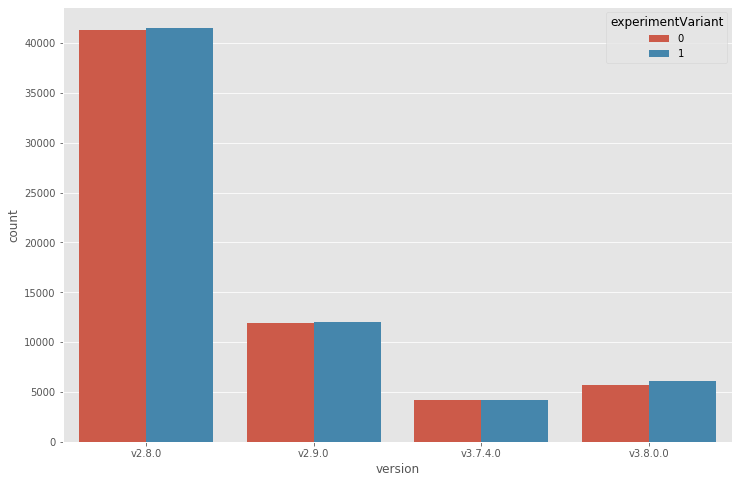

In [9]:
#В эксперименте используется 4 версии приложения, причем одна из версий используется гораздо чаще остальных. 
#Но распределение версий по группам примерно одинаковы.
plt.figure(figsize=(12,8))
sns.countplot(aa_df.version, hue=aa_df.experimentVariant)

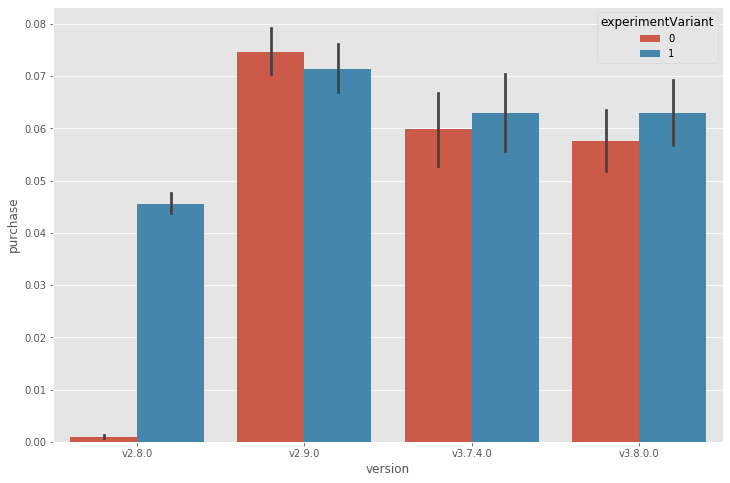

In [10]:
#Причем в различных версиях будет разная конверсия в покупку.
plt.figure(figsize=(12,8))
sns.barplot(x=aa_df.version, y=aa_df.purchase,hue=aa_df.experimentVariant)

In [11]:
aa_df.query('experimentVariant == 0').groupby('version').agg({'purchase':'mean'})

purchase
version           
v2.8.0    0.000993
v2.9.0    0.074658
v3.7.4.0  0.059943
v3.8.0.0  0.057604

In [12]:
aa_df.query('experimentVariant == 1').groupby('version').agg({'purchase':'mean'})
#Мы видим, что в группах версия приложения v2.8.0 дает очень различную конверсию в покупку.

purchase
version           
v2.8.0    0.045606
v2.9.0    0.071304
v3.7.4.0  0.063018
v3.8.0.0  0.062848

In [13]:
#Проведем тесты для каждой версии приложения:

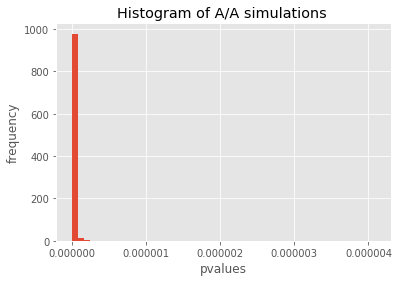

1.0

In [14]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0 and version =="v2.8.0"')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1 and version =="v2.8.0"')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

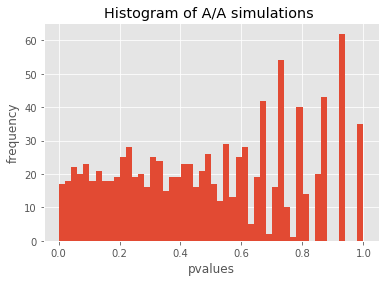

0.04

In [15]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0 and version =="v2.9.0"')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1 and version =="v2.9.0"')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

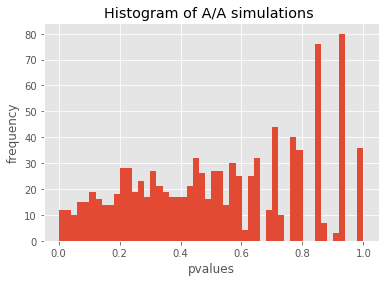

0.025

In [16]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0 and version =="v3.7.4.0"')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1 and version =="v3.7.4.0"')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

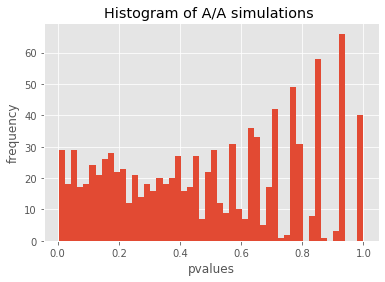

0.058

In [17]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0 and version =="v3.8.0.0"')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1 and version =="v3.8.0.0"')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [18]:
#Такие различия видимо и повлияли на чистоту эксперимента. 
#Можно попробовать убрать проблемную версию из данных и провести А/А тест.

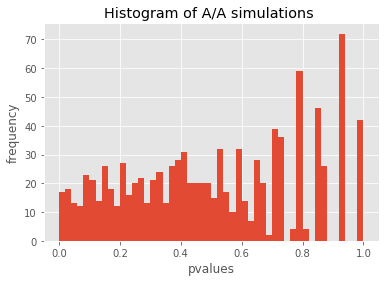

0.04

In [21]:
simulations = 1000
n_s = 1000
res = []

for i in tqdm(range(simulations)):
    s1 = aa_df.query('experimentVariant == 0 and version !="v2.8.0"')['purchase'].sample(n_s, replace = False).values
    s2 = aa_df.query('experimentVariant == 1 and version !="v2.8.0"')['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2,equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [20]:
#Убрав проблемные версии мы получили p-value<0.05, так как качество сплитования повысилось.